In [1]:
import os
import matplotlib.pyplot as plt
from cocotool import COCO
import json
%matplotlib inline

In [2]:
# Pre-loading of train and test (=val) datasets
coco = COCO("/home/space/datasets/pml_deformable_convolution/coco")
testInstances = coco.loadAnnotationFile(typeData='val', typeAnnotation='instances')
trainInstances = coco.loadAnnotationFile(typeData='train', typeAnnotation='instances')
testCaptions = coco.loadAnnotationFile(typeData='val', typeAnnotation='captions')
trainCaptions = coco.loadAnnotationFile(typeData='train', typeAnnotation='captions')
print() # Or jupyter will display the HUUUUUGE instance train dataset

Loading instances_val2017.json
instances_val2017.json loaded
Loading instances_train2017.json
instances_train2017.json loaded
Loading captions_val2017.json
captions_val2017.json loaded
Loading captions_train2017.json
captions_train2017.json loaded



In [3]:
print(trainInstances.keys(), trainCaptions.keys(), sep="\n", end="\n")

print("Info:", json.dumps(trainInstances['info'], indent=2))

print ("Train Images: " + str(len(trainInstances['images'])), "Test Images: " + str(len(testInstances['images'])), sep="\n")
print("Image Data example:", json.dumps(trainInstances['images'][0], indent=2))


dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
dict_keys(['info', 'licenses', 'images', 'annotations'])
Info: {
  "description": "COCO 2017 Dataset",
  "url": "http://cocodataset.org",
  "version": "1.0",
  "year": 2017,
  "contributor": "COCO Consortium",
  "date_created": "2017/09/01"
}
Train Images: 118287
Test Images: 5000
Image Data example: {
  "license": 3,
  "file_name": "000000391895.jpg",
  "coco_url": "http://images.cocodataset.org/train2017/000000391895.jpg",
  "height": 360,
  "width": 640,
  "date_captured": "2013-11-14 11:18:45",
  "flickr_url": "http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg",
  "id": 391895
}


Train annotations: 860001
Test annotations: 36781
Instance Annotation example: {
  "segmentation": [
    [
      239.97,
      260.24,
      222.04,
      270.49,
      199.84,
      253.41,
      213.5,
      227.79,
      259.62,
      200.46,
      274.13,
      202.17,
      277.55,
      210.71,
      249.37,
      253.41,
      237.41,
      264.51,
      242.54,
      261.95,
      228.87,
      271.34
    ]
  ],
  "area": 2765.1486500000005,
  "iscrowd": 0,
  "image_id": 558840,
  "bbox": [
    199.84,
    200.46,
    77.71,
    70.88
  ],
  "category_id": 58,
  "id": 156
}


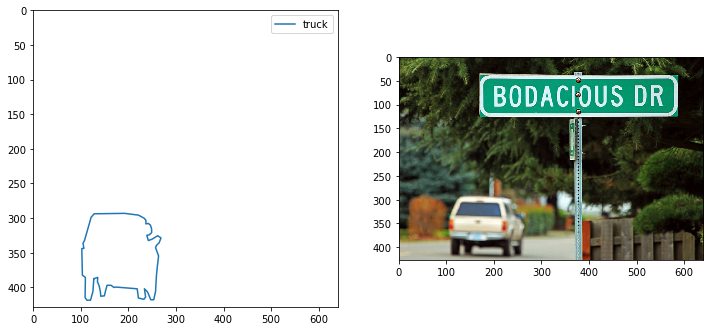

In [4]:
print ("Train annotations: " + str(len(trainInstances['annotations'])), "Test annotations: " + str(len(testInstances['annotations'])), sep="\n")
print("Instance Annotation example:", json.dumps(trainInstances['annotations'][0], indent=2))

# Loading an image with its segmentations
imageData = coco.getImageByFileName('000000189698.jpg')

plt.figure(figsize=(12,12))

# Display the segmentation
plt.subplot(221)
plt.xlim(0, imageData['width'])
plt.ylim(imageData['height'], 0)
coco.showSegmentation(imageData['instances'][0])
plt.legend()

# Display the real image to compare
plt.subplot(222)
plt.imshow(imageData['image'])



In [5]:
# Categories
categories = coco.getCategories()
print(len(categories), categories)

80 ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
# Super Categories
superCategories = coco.getSuperCategories()
print(len(superCategories), superCategories)

12 ['person', 'indoor', 'animal', 'outdoor', 'appliance', 'sports', 'electronic', 'food', 'vehicle', 'accessory', 'kitchen', 'furniture']


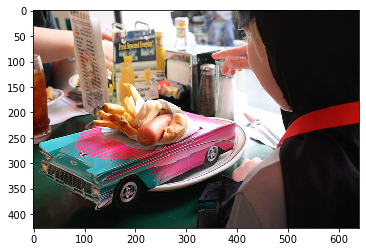

In [7]:
# Creating two generators for train and test datasets
trainData, testData = coco.loadInstancesData()

data = next(trainData)
plt.imshow(data['image'])

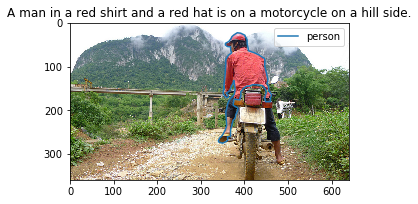

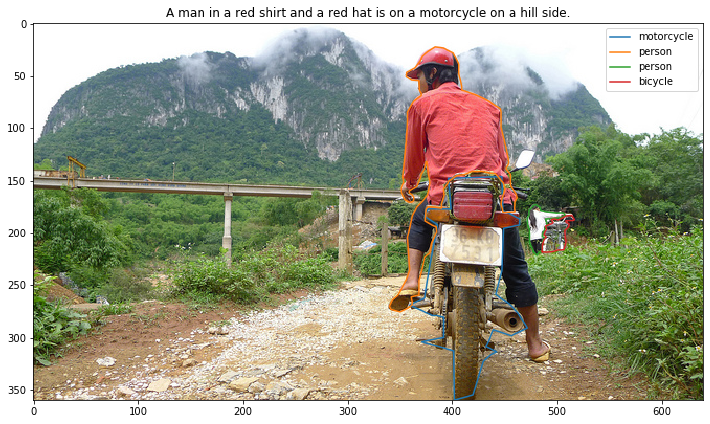

In [8]:
# Get image data (like width, height, the image itself and the segmentations associated with this image)
imageData = coco.getImageByFileName('391895.jpg')

# Display the segmentation with index 1
coco.showImageInstancesSegmentation(imageData, index = 1, figsize= (5,10))

# Display every segmentation (minArea is set to 2000 by default)
coco.showImageInstancesSegmentation(imageData, minArea = 0)

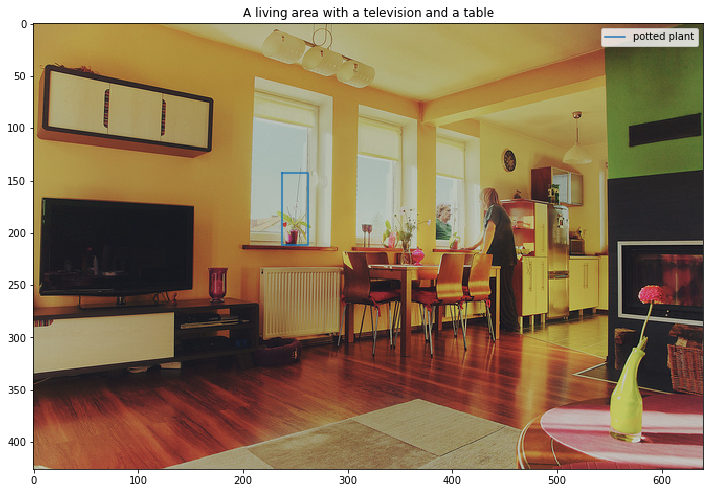

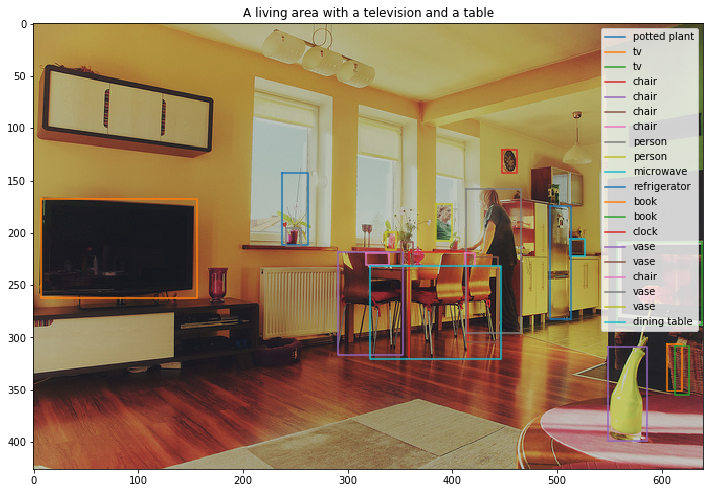

In [9]:
imageData = coco.getImageByFileName('139.jpg')

# Show Boxes around the remarquable element of index 0
coco.showImageInstancesBbox(imageData, index = 0)

# Show boxes around every remarquable elements (minArea is set to 2000 by default)
coco.showImageInstancesBbox(imageData, minArea = 0)

In [10]:
# check image sizes
trainAnnotations = coco.loadAnnotationFile(typeData='train', typeAnnotation='instances')

sizes = [(image['width'], image['height']) for image in trainAnnotations["images"]]
sizeUniques = list(set(sizes))
print(len(sizeUniques), len(trainAnnotations["images"]))

# Sizes are not unique, we need to proceed them to be acceptes by the Model
# Resize them to the same size? Pad with zeros?

2477 118287


In [13]:
def show(images, output = None):
    # Show images by file names
    # images: array, contains file names to show
    
    cols = 2
    tot = len(images)
    rows = tot // cols + 1
    
    position = range(1, tot + 1)
    
    fig = plt.figure(1, figsize = (10 * rows, 10 * cols))
    for k in range(tot):
        
        ax = fig.add_subplot(rows, cols, position[k])
        
        imageData = coco.getImageByFileName(images[k])
        coco.showImageInstancesSegmentation(imageData, figsize = (5, 5))


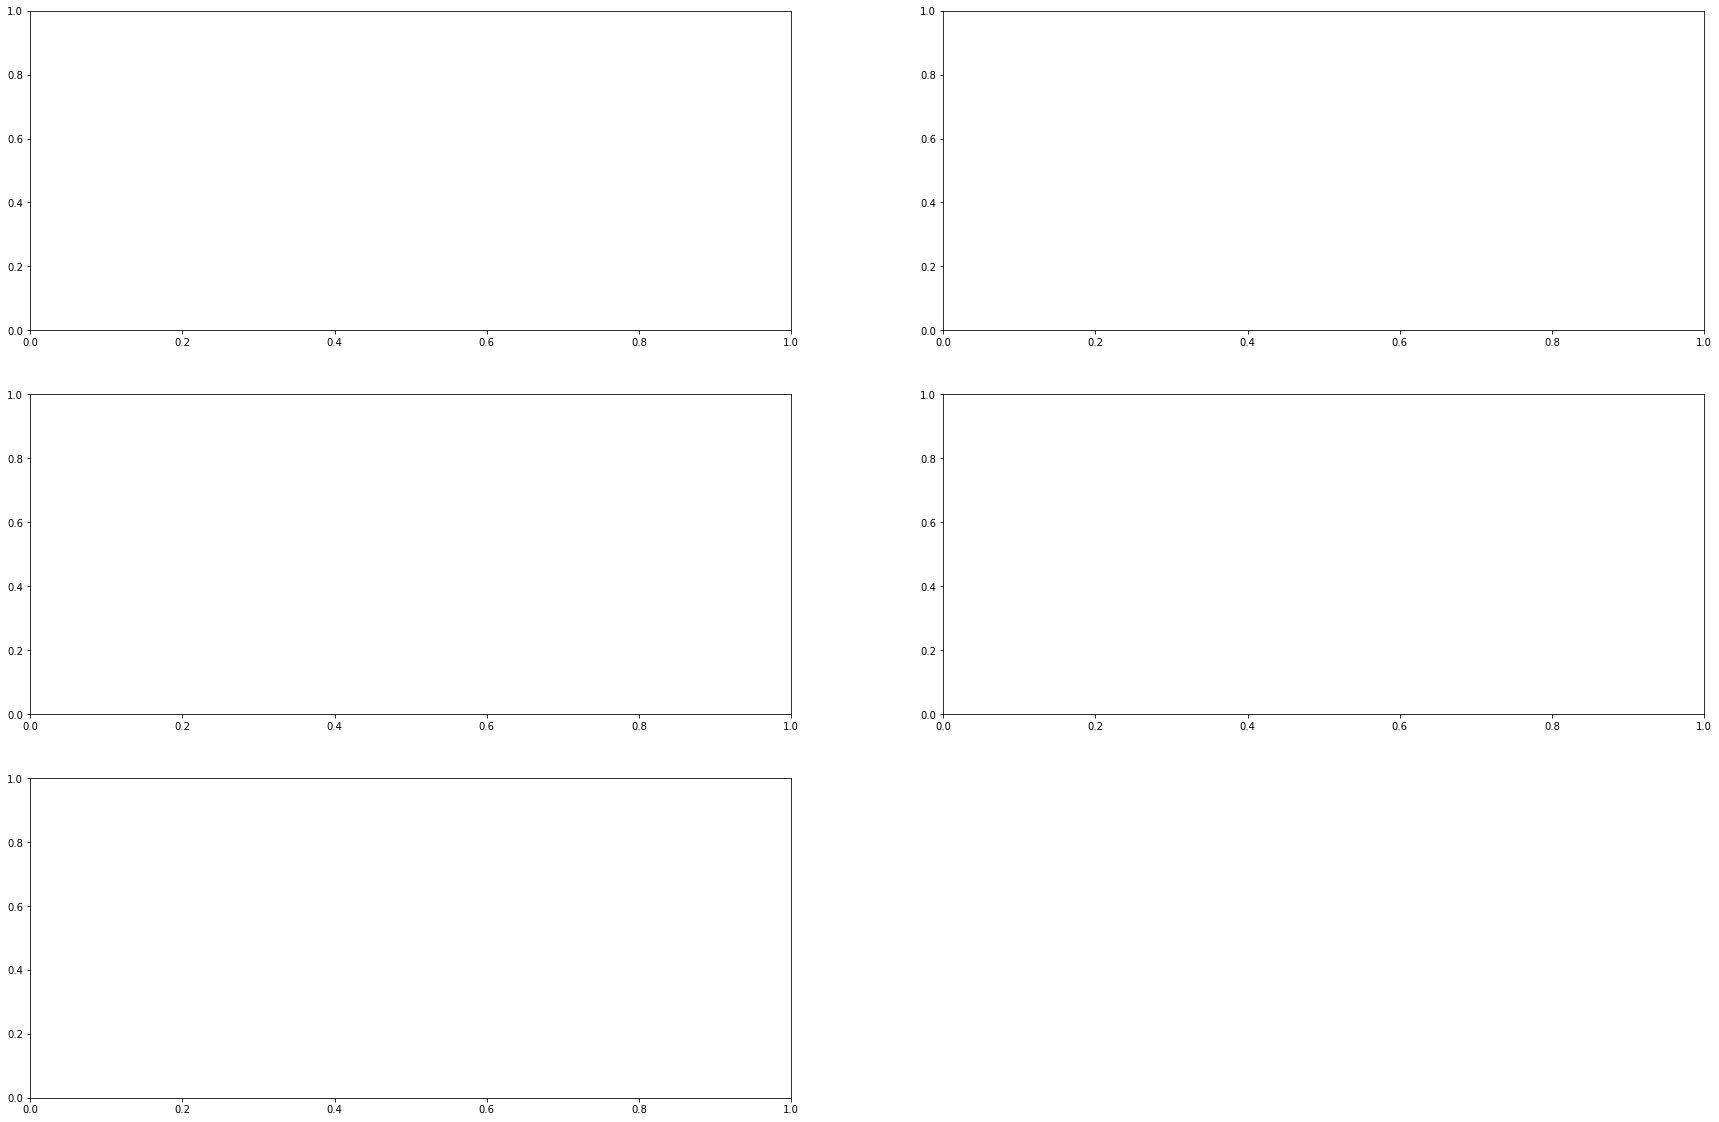

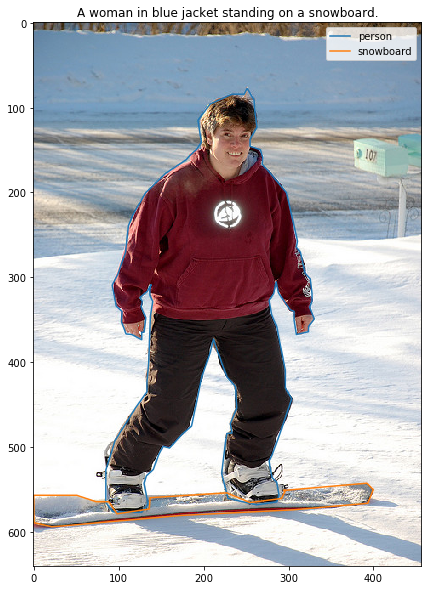

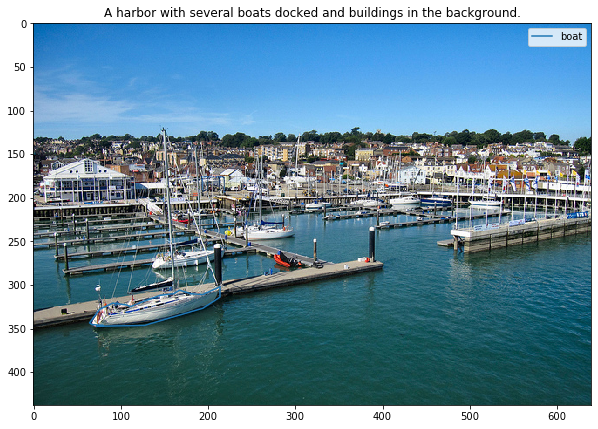

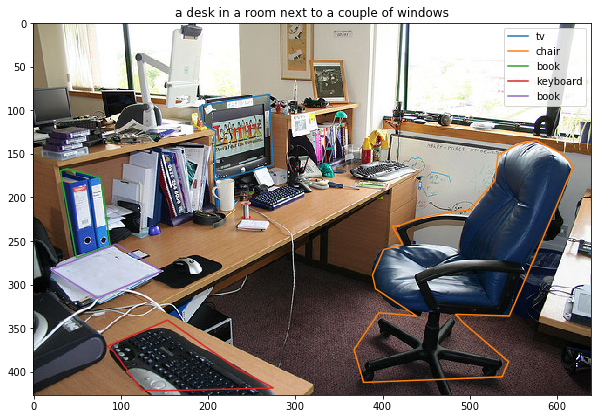

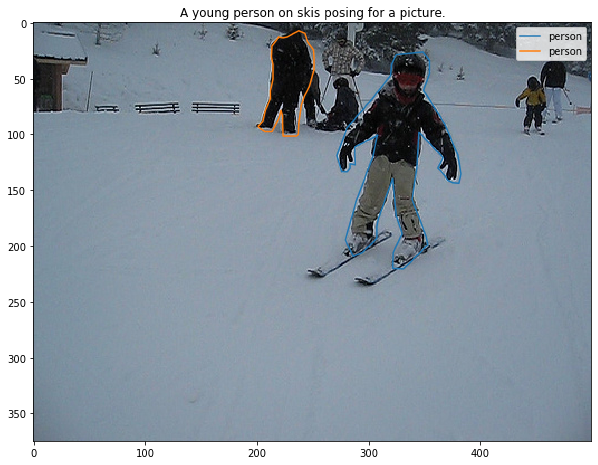

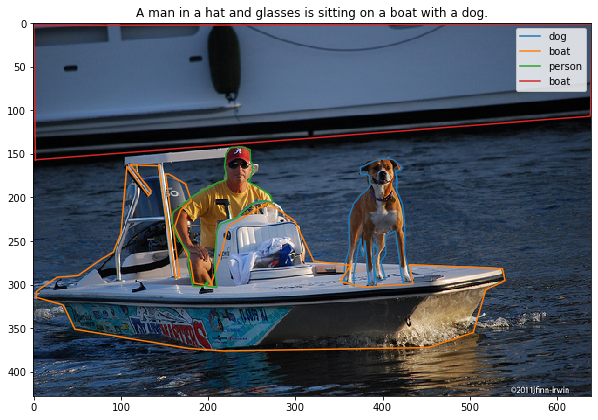

In [12]:
images = ["000000097278.jpg", "000000531495.jpg", "000000189820.jpg", "000000289417.jpg", "000000190140.jpg"]
show(images)